In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [2]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

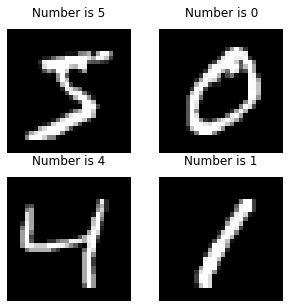

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize = (5, 5))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number is {}'.format(y_train[i]))
fig.show()    


Number is : 5


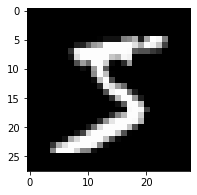

Number is : 0


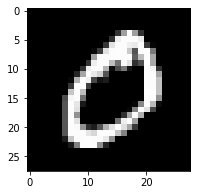

Number is : 4


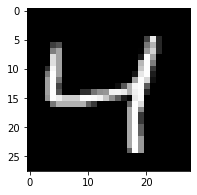

Number is : 1


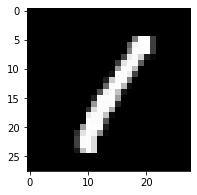

In [4]:
for i in range(0, 4):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  print("Number is :", y_train[i])
  plt.show()

In [5]:
print(x_train.ndim)

3


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28 ,28 ,1)
input_shape = (28, 28, 1)
print(x_train.ndim)

4


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2157 - accuracy: 0.9341
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0874 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0577 - accuracy: 0.9817


In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0637 - accuracy: 0.9794


[0.06367620825767517, 0.9793999791145325]

In [13]:
p=model.predict(x_test)

In [14]:
print(p[0])

[3.6887032e-10 5.8031588e-09 4.0693413e-07 3.5538626e-06 8.7391740e-11
 1.6313573e-10 1.5029125e-12 9.9999559e-01 1.0871049e-08 4.9114192e-07]
